# Assignment 3
### Due 9/21. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
NHANES = pd.read_csv('data/nhanes_data_17_18.csv', low_memory=False)
NHANES.head()
NHANES.describe()
NHANES.columns.tolist()





['SEQN',
 'GeneralHealthCondition',
 'EverBreastfedOrFedBreastmilk',
 'AgeStoppedBreastfeedingdays',
 'AgeFirstFedFormuladays',
 'AgeStoppedReceivingFormuladays',
 'AgeStartedOtherFoodbeverage',
 'AgeFirstFedMilkdays',
 'TypeOfMilkFirstFedWholeMilk',
 'TypeOfMilkFirstFed2Milk',
 'TypeOfMilkFirstFed1Milk',
 'TypeOfMilkFirstFedFatFreeMilk',
 'TypeOfMilkFirstFedSoyMilk',
 'TypeOfMilkFirstFedOther',
 'HowHealthyIsTheDiet',
 'Past30DayMilkProductConsumption',
 'YouDrinkWholeOrRegularMilk',
 'YouDrink2FatMilk',
 'YouDrink1FatMilk',
 'YouDrinkFatFreeskimMilk',
 'YouDrinkSoyMilk',
 'YouDrinkAnotherTypeOfMilk',
 'RegularMilkUse5TimesPerWeek',
 'HowOftenDrankMilkAge512',
 'HowOftenDrankMilkAge1317',
 'HowOftenDrankMilkAge1835',
 'CommunitygovernmentMealsDelivered',
 'EatMealsAtCommunityseniorCenter',
 'AttendKindergartenThruHighSchool',
 'SchoolServesSchoolLunches',
 'OfTimesweekGetSchoolLunch',
 'SchoolLunchFreeReducedOrFullPrice',
 'SchoolServeCompleteBreakfastEachDay',
 'OfTimesweekGetSchoolB

In [2]:
row_count = len(NHANES)
print(f"Total number of rows: {row_count}")
NHANES['GeneralHealthCondition'].value_counts(dropna=False)


Total number of rows: 8366


GeneralHealthCondition
Good         2454
NaN          2402
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64

In [3]:
missing_values_count = NHANES['GeneralHealthCondition'].isnull().sum()
print(f"Missing values in 'GeneralHealthCondition': {missing_values_count}")
NHANES_NEW = NHANES.dropna(subset=['GeneralHealthCondition'])
row_count = len(NHANES_NEW)
print(f"Total number of rows: {row_count}")
NHANES_NEW['GeneralHealthCondition'].value_counts(dropna=False)





Missing values in 'GeneralHealthCondition': 2402
Total number of rows: 5964


GeneralHealthCondition
Good         2454
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64

In [4]:
missing_values_count = NHANES_NEW['AnnualFamilyIncome'].isnull().sum()
print(f"Missing values in 'AnnualFamilyIncome': {missing_values_count}")
NHANES_Final = NHANES_NEW.dropna(subset=['AnnualFamilyIncome'])
row_count = len(NHANES_Final)
print(f"Total number of rows: {row_count}")
NHANES_Final['AnnualFamilyIncome'].value_counts(dropna=False)

Missing values in 'AnnualFamilyIncome': 722
Total number of rows: 5242


AnnualFamilyIncome
100000.0    1024
30000.0      652
40000.0      599
87500.0      533
50000.0      399
22500.0      380
17500.0      358
60000.0      347
12500.0      294
70000.0      260
2000.0       209
7500.0       187
Name: count, dtype: int64

In [5]:
NHANES_Final_Analysis = NHANES_Final[['AnnualFamilyIncome', 'GeneralHealthCondition']]
# NHANES_Final_Analysis.isnull().sum()
print(NHANES_Final_Analysis.head())
print(NHANES_Final_Analysis.describe())

   AnnualFamilyIncome GeneralHealthCondition
2             12500.0                   Good
4             70000.0                   Good
5             30000.0                   Good
7            100000.0              Very good
8             17500.0                   Good
       AnnualFamilyIncome
count         5242.000000
mean         51857.687905
std          32830.869995
min           2000.000000
25%          22500.000000
50%          40000.000000
75%          87500.000000
max         100000.000000


In [6]:
contingency_table = pd.crosstab(NHANES_Final_Analysis['AnnualFamilyIncome'], NHANES_Final_Analysis['GeneralHealthCondition'])
contingency_table

GeneralHealthCondition,Excellent,Fair or,Good,Poor?,Very good
AnnualFamilyIncome,,,,,
2000.0,26,59,71,13,40
7500.0,15,60,66,19,27
12500.0,19,109,122,9,35
17500.0,24,91,152,18,73
22500.0,33,91,175,15,66
30000.0,62,141,295,19,135
40000.0,59,111,277,18,134
50000.0,40,71,173,8,107
60000.0,31,55,151,4,106


Based on my analysis, I would conclude that there is an association between Annual Family Income and General Health Condition. It seems like as income increases, health condition also becomes better. From my standpoint, this makes sense as more income means you have more money to spend on health care and take care of yourself. 

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [11]:
missing_values_count = NHANES['GeneralHealthCondition'].isnull().sum()
print(f"Missing values in 'GeneralHealthCondition': {missing_values_count}")
NHANES_NEW = NHANES.dropna(subset=['GeneralHealthCondition'])
row_count = len(NHANES_NEW)
print(f"Total number of rows: {row_count}")
NHANES_NEW['GeneralHealthCondition'].value_counts(dropna=False)

Missing values in 'GeneralHealthCondition': 2402
Total number of rows: 5964


GeneralHealthCondition
Good         2454
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64

In [10]:
missing_values_count = NHANES_NEW['BodyMassIndexKgm2'].isnull().sum() 
print(f"Missing values in 'BodyMassIndexKgm2': {missing_values_count}")
NHANES_Final = NHANES_NEW.dropna(subset=['BodyMassIndexKgm2'])
row_count = len(NHANES_Final)
print(f"Total number of rows: {row_count}")
NHANES_Final['BodyMassIndexKgm2'].value_counts(dropna=False)

Missing values in 'BodyMassIndexKgm2': 72
Total number of rows: 5892


BodyMassIndexKgm2
24.3    50
26.1    48
27.9    46
26.6    44
28.0    43
        ..
49.2     1
68.2     1
13.8     1
84.4     1
15.0     1
Name: count, Length: 420, dtype: int64

In [9]:
NHANES_Final_Analysis_2 = NHANES_Final[['GeneralHealthCondition', 'BodyMassIndexKgm2']]
# NHANES_Final_Analysis.isnull().sum()
# NHANES_Final_Analysis_2.head()
print(NHANES_Final_Analysis_2.value_counts(dropna=False))
print(NHANES_Final_Analysis_2.describe())

GeneralHealthCondition  BodyMassIndexKgm2
Good                    24.6                 24
                        26.6                 24
Very good               26.1                 21
Good                    28.3                 21
                        29.9                 21
                                             ..
Very good               48.5                  1
                        49.0                  1
                        49.3                  1
                        49.9                  1
                        51.3                  1
Name: count, Length: 1278, dtype: int64
       BodyMassIndexKgm2
count        5892.000000
mean           28.976952
std             7.547699
min            13.200000
25%            23.800000
50%            27.900000
75%            32.900000
max            86.200000


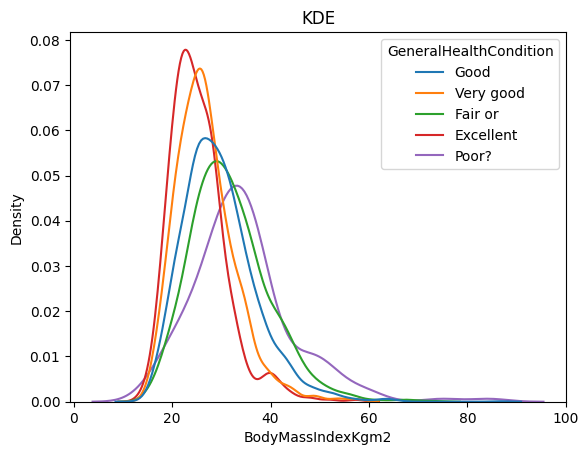

In [12]:
import seaborn as sns
conditioner = 'GeneralHealthCondition'
sns.kdeplot( data=NHANES_Final_Analysis_2, x='BodyMassIndexKgm2', hue= conditioner, common_norm=False ).set(title='KDE')
plt.show()

In [13]:
NHANES_Final_Analysis_2.groupby("GeneralHealthCondition")["BodyMassIndexKgm2"].describe()




,count,mean,std,min,25%,50%,75%,max
GeneralHealthCondition,,,,,,,,
Excellent,611.0,25.291489,5.706559,13.8,21.400,24.3,28.1,57.3
Fair or,1152.0,31.719358,8.030610,15.0,26.100,30.8,36.1,72.6
Good,2425.0,29.600948,7.480121,13.2,24.500,28.7,33.5,86.2
Poor?,170.0,34.252353,10.318606,14.9,28.275,33.3,37.7,84.4
Very good,1534.0,26.814342,6.154614,14.6,22.600,26.1,30.1,57.7


As health condition declines from “Excellent” to “Poor”, the BMI distribution shifts to the right, meaning that BMI gets higher. This shows that higher BMI leads to lower self-reported health.Those with excellent/good health are more tightly in the normal BMI range, while those reporting poor health show higher levels of BMI. Based on the output of the description table, seems like most of the sample size had a average BMI index values, considering that based on the clustering groups, majority of them were in the Fair or Good. 

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

# Derivation:


*1*: Treat $\hat y(z)$ as a scalar parameter; differentiate and set derivative equal to zero:

$$
\frac{\partial}{\partial \hat y(z)}\mathrm{MSE}(\hat y(z))
= \frac{1}{N}\sum_{i=1}^N 2\bigl(\hat y(z)-y_i\bigr)\,\frac{1}{h}k\!\Bigl(\frac{z-x_i}{h}\Bigr)=0.
$$

Remove the constant factor $2/(N h)$ (nonzero) to get

$$
\sum_{i=1}^N \bigl(\hat y(z)-y_i\bigr)\,k\!\Bigl(\frac{z-x_i}{h}\Bigr)=0.
$$

Solve for $\hat y(z)$. First, expand the first term:

$$
\hat y(z)\sum_{i=1}^N k\!\Bigl(\frac{z-x_i}{h}\Bigr)
-\sum_{i=1}^N y_i\,k\!\Bigl(\frac{z-x_i}{h}\Bigr)=0.
$$

Isolate $\hat y(z)$:

$$
\hat y(z)
= \frac{\sum_{i=1}^N y_i\,k\!\bigl(\frac{z-x_i}{h}\bigr)}
{\sum_{i=1}^N k\!\bigl(\frac{z-x_i}{h}\bigr)}.
$$

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

In [14]:
file_path = 'data/ames_prices.csv'
Price = pd.read_csv(file_path)
Price.head()
Price.columns.tolist()


['Order',
 'PID',
 'area',
 'price',
 'MS.SubClass',
 'MS.Zoning',
 'Lot.Frontage',
 'Lot.Area',
 'Street',
 'Alley',
 'Lot.Shape',
 'Land.Contour',
 'Utilities',
 'Lot.Config',
 'Land.Slope',
 'Neighborhood',
 'Condition.1',
 'Condition.2',
 'Bldg.Type',
 'House.Style',
 'Overall.Qual',
 'Overall.Cond',
 'Year.Built',
 'Year.Remod.Add',
 'Roof.Style',
 'Roof.Matl',
 'Exterior.1st',
 'Exterior.2nd',
 'Mas.Vnr.Type',
 'Mas.Vnr.Area',
 'Exter.Qual',
 'Exter.Cond',
 'Foundation',
 'Bsmt.Qual',
 'Bsmt.Cond',
 'Bsmt.Exposure',
 'BsmtFin.Type.1',
 'BsmtFin.SF.1',
 'BsmtFin.Type.2',
 'BsmtFin.SF.2',
 'Bsmt.Unf.SF',
 'Total.Bsmt.SF',
 'Heating',
 'Heating.QC',
 'Central.Air',
 'Electrical',
 'X1st.Flr.SF',
 'X2nd.Flr.SF',
 'Low.Qual.Fin.SF',
 'Bsmt.Full.Bath',
 'Bsmt.Half.Bath',
 'Full.Bath',
 'Half.Bath',
 'Bedroom.AbvGr',
 'Kitchen.AbvGr',
 'Kitchen.Qual',
 'TotRms.AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace.Qu',
 'Garage.Type',
 'Garage.Yr.Blt',
 'Garage.Finish',
 'Garage.Cars',
 'Ga

In [17]:
row_count = len(Price)
print(f"Total number of rows: {row_count}")


Total number of rows: 2930


In [21]:
print(Price['Overall.Qual'].value_counts(dropna=False))
missing_values_count = Price['Overall.Qual'].isnull().sum() 
print(f"Missing values in 'Overall.Qual': {missing_values_count}")

Overall.Qual
5     825
6     732
7     602
8     350
4     226
9     107
3      40
10     31
2      13
1       4
Name: count, dtype: int64
Missing values in 'Overall.Qual': 0


In [25]:
print(Price['price'].value_counts(dropna=False))
missing_values_count = Price['price'].isnull().sum() 
print(f"Missing values in 'price': {missing_values_count}")

price
135000    34
140000    33
130000    29
155000    28
145000    26
          ..
164990     1
117250     1
97900      1
35000      1
138887     1
Name: count, Length: 1032, dtype: int64
Missing values in 'price': 0


In [26]:
Price_Final = Price[['price', 'Overall.Qual']]
# Price_Final.isnull().sum()
print(Price_Final.value_counts(dropna=False))
print( Price_Final.head())


price   Overall.Qual
130000  5               22
135000  5               21
145000  5               15
140000  5               14
127000  5               13
                        ..
153337  5                1
153000  4                1
152500  7                1
        5                1
154204  6                1
Name: count, Length: 1598, dtype: int64
    price  Overall.Qual
0  215000             6
1  105000             5
2  172000             6
3  244000             7
4  189900             5


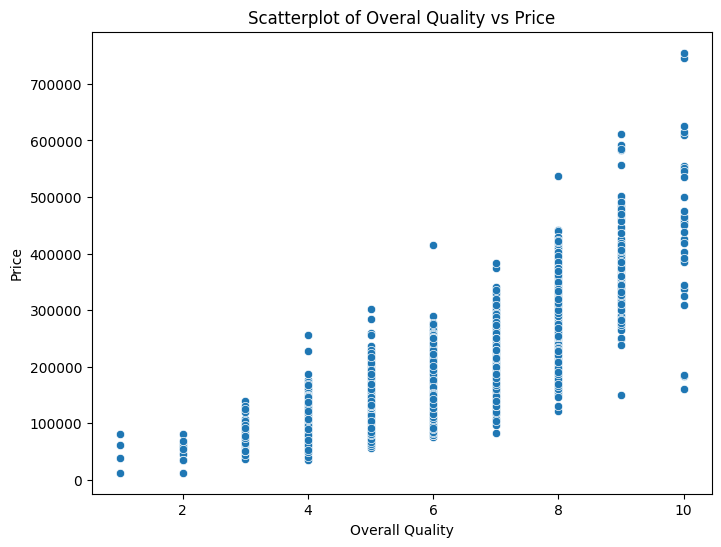

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Overall.Qual', y='price', data=Price_Final)
plt.xlabel('Overall Quality')
plt.ylabel('Price')
plt.title('Scatterplot of Overal Quality vs Price')
plt.show()

<Axes: xlabel='Overall.Qual', ylabel='price'>

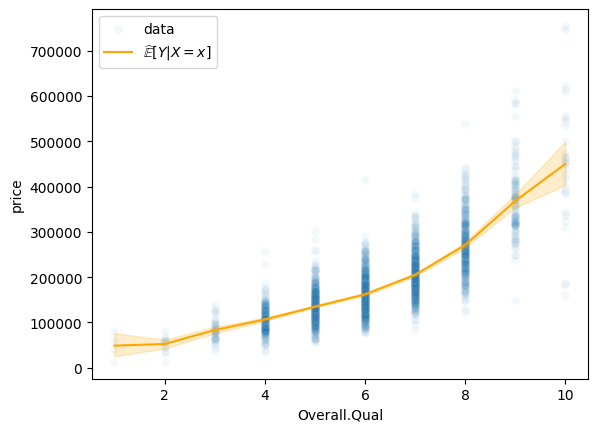

In [28]:
means = Price.loc[:,['price','Overall.Qual']].groupby('Overall.Qual').mean()
sns.scatterplot(data=Price_Final, y='price', x='Overall.Qual',alpha=.05, label='data')
sns.lineplot(data=Price_Final, x='Overall.Qual',y='price',color='orange', label='$\\widehat{\\mathbb{E}}[Y|X=x]$')



The concept of causality is a difficult one, but I think the answer is yes. It is important to address this because just becuase X can predict Y, doesn't mean X causes Y. In this case. Overall Quality doesn't necessarily cause higher prices. The hidden variables in play are economic concepts such as supply and demand, and the value of money. Money is the way we measure value. Because higher quality indicates higher value, the higher the quality, the higher the price. 

As I mentioned previously, even though X might not cause Y, doesn't mean we can use X to predict Y. In other words there might be a relationship between X and Y even if it is not causal relationship. A threat in my specific example is the measure of "quality". The quality variable is not defined and could be subjective. One person's view of good quality might mean clean appliances while another person's might be a good looking house. This makes it hard to say for sure that quality drives prices, given quality is undefined. Additonally, limited supplies and a poor housing market can push up prices, independent of actual quality. This is why it is important for us to define these variables. But Yes, you can still use this model to predict prices given quality becuase it has been a reliable indicator for other models and the scatterplot shows a positive relationship between quality and price. The CEF makes sense since it shows us the expected value given knowledge of the quality of the house. It follows the trend of the scatterplot which checks out. 